# Anibal Muñoz
# 21.087.122-5
# Diego Vergara
# 19.940.239-0
# Cristobal Galaz
# 20.359.833-5

In [3]:
#------Manejo de datos------
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
#------Modelos------
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#------Reportes------
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data_train = pd.read_excel("data_train.xlsx")
data_test = pd.read_excel("data_test.xlsx")

In [5]:
data_test = pd.DataFrame(data_test)
data_test.shape

(103284, 24)

In [6]:
data_train = pd.DataFrame(data_train)
data_train.shape

(25810, 24)

# Con los datos cargados se procedera a realizar regresion

In [10]:
# Se decide que se va a realizar regresion a las variables relacionadas con el atraso de los vuelos
X_train = data_train.drop(columns = ["Departure Delay in Minutes", "Arrival Delay in Minutes"])
y_train = data_train[["Departure Delay in Minutes", "Arrival Delay in Minutes"]]
X_test = data_test.drop(columns = ["Departure Delay in Minutes", "Arrival Delay in Minutes"])
y_test = data_test[["Departure Delay in Minutes", "Arrival Delay in Minutes"]]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25810, 22)
(25810, 2)
(103284, 22)
(103284, 2)


In [14]:
# Escaladores
scaler_X = StandardScaler()
scaler_y = StandardScaler()
# Escalar X
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
# Escalar y
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# corroborar formas
print(X_train_scaled.shape)
print(y_train_scaled.shape)
print(X_test_scaled.shape)
print(y_test_scaled.shape)

(25810, 22)
(25810, 2)
(103284, 22)
(103284, 2)


In [18]:
#knn
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train_scaled)
y_pred = knn.predict(X_test_scaled)
print("MSE KNN:", mean_squared_error(y_test_scaled, y_pred))

#random forest regression
rf = RandomForestRegressor(n_estimators=100, random_state=366)
rf.fit(X_train_scaled, y_train_scaled)
y_pred = rf.predict(X_test_scaled)
print("MSE Random Forest:", mean_squared_error(y_test_scaled, y_pred))

#regresion lineal multiple
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)
y_pred = lr.predict(X_test)
print("MSE Regresión Lineal:", mean_squared_error(y_test_scaled, y_pred))

#regresion polinomica multiple
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_scaled, y_train_scaled)
y_pred = poly_model.predict(X_test_scaled)
print("MSE Regresión Polinómica:", mean_squared_error(y_test_scaled, y_pred))

#Red Neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta con 64 neuronas y ReLU
    Dense(32, activation='relu'),  # Otra capa oculta para mayor complejidad
    Dense(2)  
])
model.compile(optimizer='adam', loss='mse')
# Entrenamiento
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=4, verbose=0)
# Evaluación
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Desnormalizamos la predicción
y_true = scaler_y.inverse_transform(y_test_scaled)
mse = np.mean((y_true - y_pred)**2)
print("MSE Red Neuronal:", mse)

MSE KNN: 1.128294401946499
MSE Random Forest: 0.8683778665628501
MSE Regresión Lineal: 104.30787319160012


C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


MSE Regresión Polinómica: 0.9365565094408115


C:\Users\Alumno\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3228/3228 ━━━━━━━━━━━━━━━━━━━━ 1s 346us/step
MSE Red Neuronal: 1363.881780211063


In [24]:
models = [ knn, rf, lr, poly_model, model]
nombres = [ 'KNN', 'random forest regression', 'regresion lineal multiple', 'regresion polinomica multiple', 'Red Neuronal']

KNN - MSE: 1.1283, R²: -0.0692


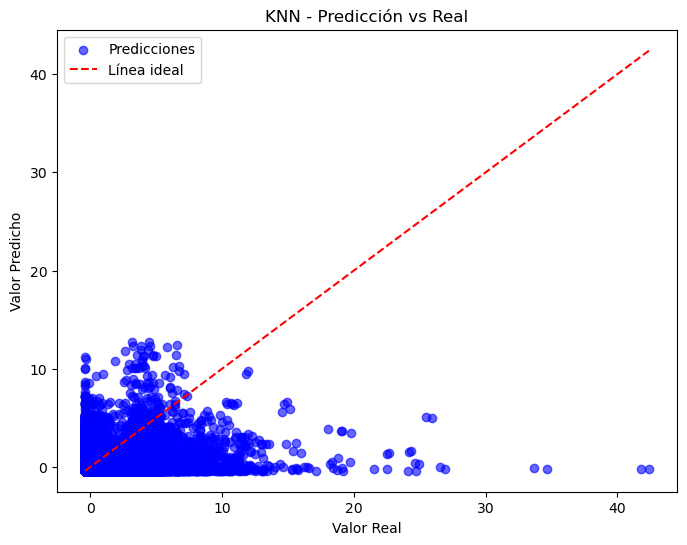

random forest regression - MSE: 0.8684, R²: 0.1771


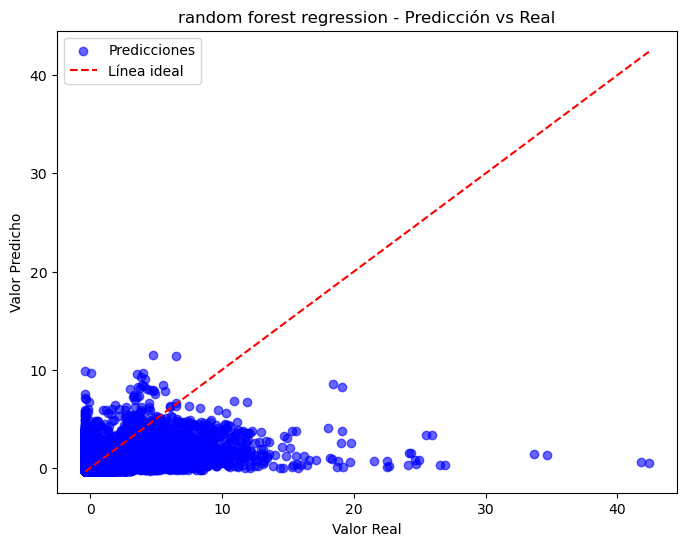

regresion lineal multiple - MSE: 1.0440, R²: 0.0107


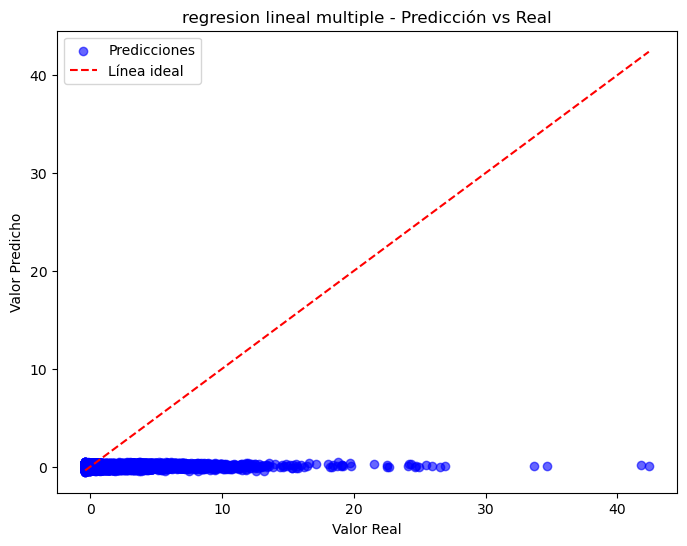

regresion polinomica multiple - MSE: 0.9366, R²: 0.1125


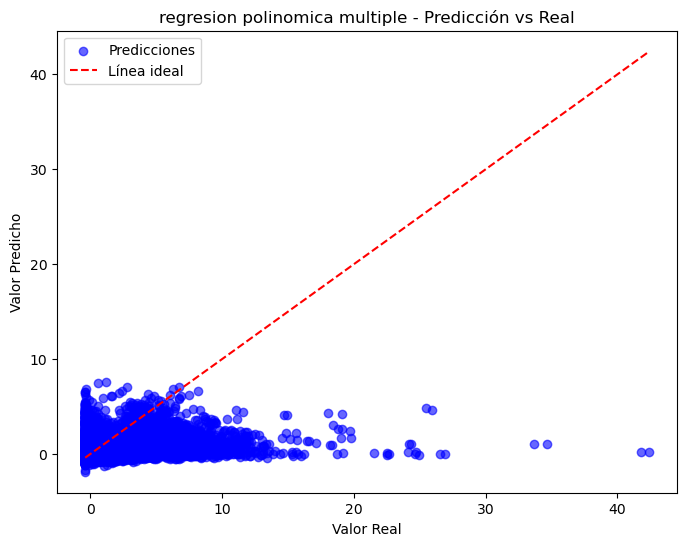

3228/3228 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step
Red Neuronal - MSE: 0.9759, R²: 0.0752


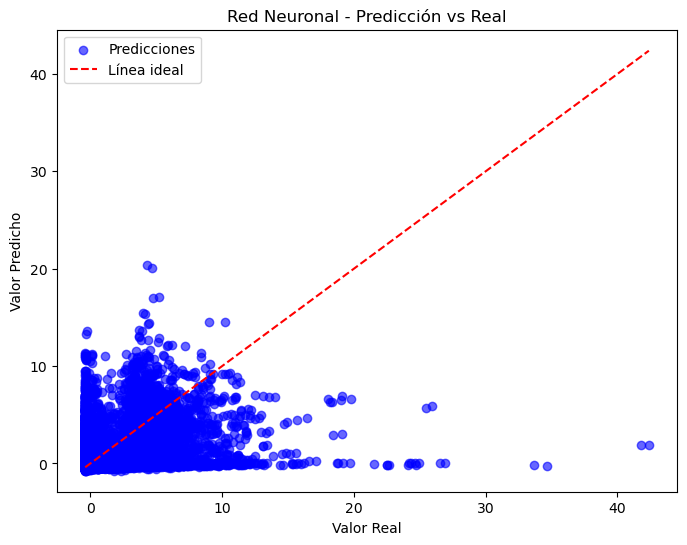

In [34]:
def modelo_report(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, nombres, scaler_y=None):
    # Predicciones
    y_pred_scaled = model.predict(X_test_scaled)
    if scaler_y:
        y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Desnormalizamos la predicción
        y_true = scaler_y.inverse_transform(y_test_scaled)
    else:
        y_pred = y_pred_scaled
        y_true = y_test_scaled
    # Cálculo de MSE y R²
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    # Mostrar el MSE y R²
    print(f"{nombres} - MSE: {mse:.4f}, R²: {r2:.4f}")
    # Gráfico Predicción vs Real
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', label='Predicciones', alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Línea ideal')
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Predicho')
    plt.title(f'{nombres} - Predicción vs Real')
    plt.legend()
    plt.show()

for i in range (len(models)):
    modelo_report(models[i], X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, nombres[i], scaler_y=None)